In [4]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="a+SPfcx/RuPvNNsviCfNULHxydlHZe2U5qw+c5TVAmA=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [5]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr') 

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.059', '現金賣出': '4.263'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.18', '現金賣出': '42.3'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.43', '現金賣出': '21.21'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.54', '現金賣出': '23.45'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.93', '現金賣出': '24.84'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.67', '現金賣出': '36.87'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2102', '現金賣出': '0.223'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.32', '現金賣出': '19.17'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8471', '現金賣出': '1.0371'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.4999', '現金賣出': '0.6319'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.44', '現金賣出': '34.78'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.385', '現金賣出': '7.91'},

In [6]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True
    
filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.059', '現金賣出': '4.263'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.18', '現金賣出': '42.3'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.43', '現金賣出': '21.21'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.54', '現金賣出': '23.45'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.93', '現金賣出': '24.84'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.67', '現金賣出': '36.87'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2102', '現金賣出': '0.223'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.32', '現金賣出': '19.17'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8471', '現金賣出': '1.0371'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.4999', '現金賣出': '0.6319'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.44', '現金賣出': '34.78'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.385', '現金賣出': '7.91'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.418', '現金賣出': '4.58'}]

In [7]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '現金買入': 32.345, '現金賣出': 33.015},
 {'幣別': '港幣 (HKD)', '現金買入': 4.059, '現金賣出': 4.263},
 {'幣別': '英鎊 (GBP)', '現金買入': 40.18, '現金賣出': 42.3},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.43, '現金賣出': 21.21},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.54, '現金賣出': 23.45},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 23.93, '現金賣出': 24.84},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 35.67, '現金賣出': 36.87},
 {'幣別': '日圓 (JPY)', '現金買入': 0.2102, '現金賣出': 0.223},
 {'幣別': '紐元 (NZD)', '現金買入': 18.32, '現金賣出': 19.17},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8471, '現金賣出': 1.0371},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.4999, '現金賣出': 0.6319},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 33.44, '現金賣出': 34.78},
 {'幣別': '韓元 (KRW)', '現金買入': 0.0211, '現金賣出': 0.025},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00104, '現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.385, '現金賣出': 7.91},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.418, '現金賣出': 4.58}]

In [9]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入",ascending=False)
df.head()


,幣別,現金買入,現金賣出
2,英鎊 (GBP),40.180,42.300
6,瑞士法郎 (CHF),35.670,36.870
12,歐元 (EUR),33.440,34.780
0,美金 (USD),32.345,33.015
5,新加坡幣 (SGD),23.930,24.840


In [10]:
df.tail()

,幣別,現金買入,現金賣出
10,菲國比索 (PHP),0.49990,0.63190
7,日圓 (JPY),0.21020,0.22300
13,韓元 (KRW),0.02110,0.02500
11,印尼幣 (IDR),0.00168,0.00238
14,越南盾 (VND),0.00104,0.00145


In [11]:
#subscript
df['現金買入']


2     40.18000
6     35.67000
12    33.44000
0     32.34500
5     23.93000
4     22.54000
3     20.43000
8     18.32000
15     6.38500
16     4.41800
1      4.05900
9      0.84710
10     0.49990
7      0.21020
13     0.02110
11     0.00168
14     0.00104
Name: 現金買入, dtype: float64

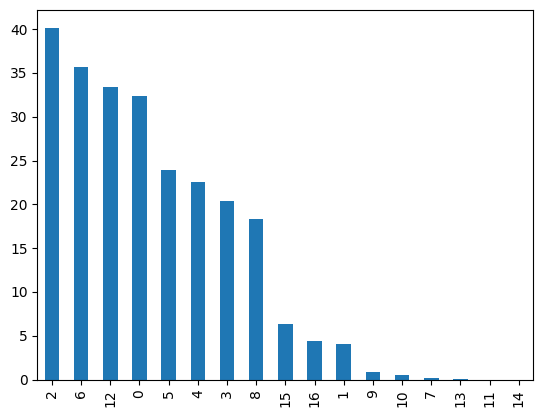

In [13]:
import matplotlib.pyplot as plt
df['現金買入'].plot(kind='bar')
plt.show()


In [20]:
df['幣別'].apply(lambda x: x.split()[-1])


2     (GBP)
6     (CHF)
12    (EUR)
0     (USD)
5     (SGD)
4     (CAD)
3     (AUD)
8     (NZD)
15    (MYR)
16    (CNY)
1     (HKD)
9     (THB)
10    (PHP)
7     (JPY)
13    (KRW)
11    (IDR)
14    (VND)
Name: 幣別, dtype: object

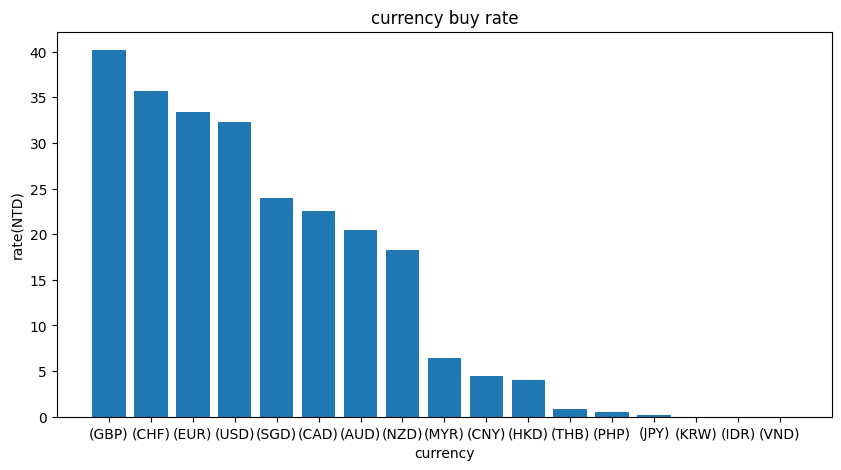

In [15]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('currency buy rate')
ax_1.set_xlabel('currency')
ax_1.set_ylabel('rate(NTD)')
plt.show()
# 2/22完成